In [1]:

import pandas as pd
import sklearn.metrics as metrique
from pandas import Series
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten
from tensorflow.keras.layers import RepeatVector, Dense, Activation, Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K, regularizers, Model, metrics
from tensorflow.keras.backend import cast

2025-04-01 16:33:15.014372: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('../Downloads/creditcard.csv')
col_del = ['Time' ,'V5', 'V6', 'V7', 'V8', 'V9','V13','V15', 'V16',  'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']



0    284315
1       492
Name: Class, dtype: int64


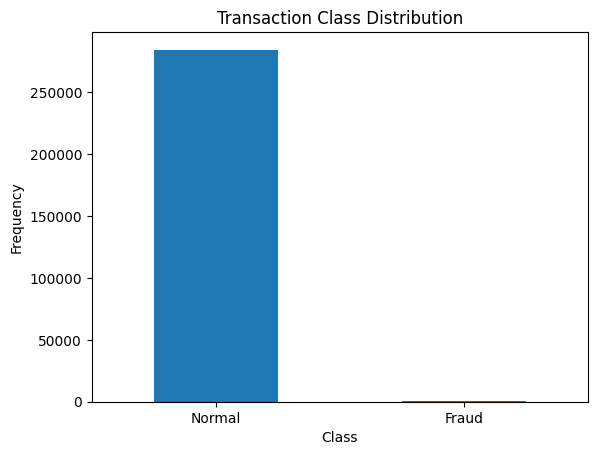

In [3]:
labels_dist = pd.value_counts(df['Class'], sort = True)

labels_dist.plot(kind = 'bar', rot = 0)
plt.title('Transaction Class Distribution')
plt.xticks(range(2), ["Normal", "Fraud"])
plt.xlabel('Class')
plt.ylabel('Frequency')


print(labels_dist)

In [4]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]


print(frauds['Amount'].describe())
print('\n')
print(normal['Amount'].describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


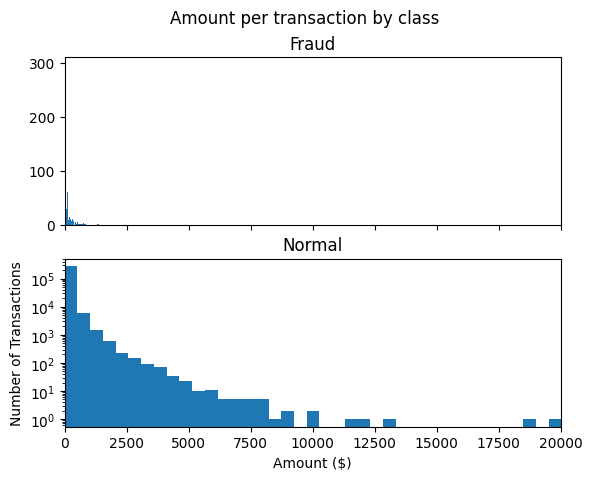

In [5]:
wholeFrame, (subFrame1, subFrame2) = plt.subplots(2, 1, sharex = True)

wholeFrame.suptitle('Amount per transaction by class')

BIN = 50

subFrame1.hist(frauds['Amount'], bins = BIN)
subFrame2.hist(normal['Amount'], bins = BIN)

subFrame1.set_title('Fraud')
subFrame2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')

plt.xlim(0, 20000)
plt.yscale('log')

Text(0.5, 1.0, 'Time vs Amount')

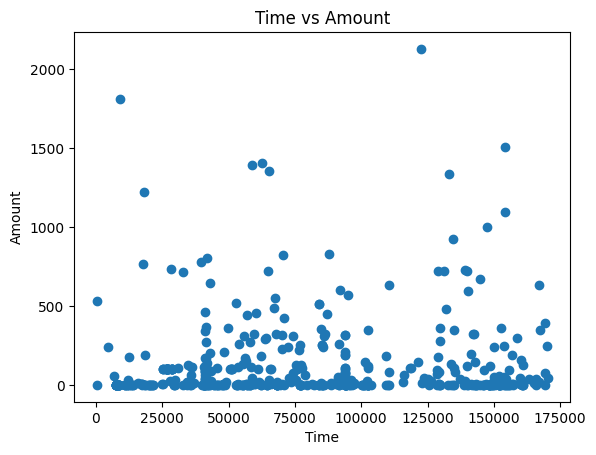

In [ ]:
plt.scatter(frauds['Time'], frauds['Amount'])
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Time vs Amount')

#No visibly patterns of difference of amount transactions with time changes

In [6]:
tr_data = df.drop(col_del,axis =1)
tr_data.shape

(284807, 10)

In [7]:
X = tr_data.drop(['Class'], axis = 'columns')
Label_Data = tr_data['Class']

In [8]:
 #Generate and plot imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(tr_data['Class'])
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(tr_data['Class'] == label)[0]

Counter({0: 284315, 1: 492})


In [9]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_r, y = oversample.fit_resample(X, tr_data['Class'])
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]

Counter({0: 284315, 1: 284315})


In [10]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
X_r2 = StandardScaler().fit_transform(X_r)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X_r2, y, test_size=0.3)

In [12]:
X_train.shape

(398041, 9)

In [13]:
X_test.shape

(170589, 9)

In [14]:
# design network
np.random.seed(7)

# X_train et X_val sont des dataframe qui contient les features
train_LSTM_X=X_train
val_LSTM_X=X_test

## Reshape input to be 3D [samples, timesteps, features] (format requis par LSTM)
train_LSTM_X = train_LSTM_X.reshape((train_LSTM_X.shape[0], 1, train_LSTM_X.shape[1]))
val_LSTM_X = val_LSTM_X.reshape((val_LSTM_X.shape[0], 1, val_LSTM_X.shape[1]))

## Recuperation des labels
train_LSTM_y=y_train
val_LSTM_y=y_test

In [15]:
inputs=Input((1,9))
x1=LSTM(50,dropout=0.3,recurrent_dropout=0.2, return_sequences=True)(inputs) # Added return_sequences=True
x2=LSTM(50,dropout=0.3,recurrent_dropout=0.2)(x1)
outputs=Dense(1,activation='sigmoid')(x2)
model=Model(inputs,outputs)

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [17]:
history=model.fit(train_LSTM_X, train_LSTM_y,epochs=50,batch_size=20000, validation_data=(val_LSTM_X, val_LSTM_y))


Epoch 1/50
20/20 [==============================] - 17s 441ms/step - loss: 0.6675 - accuracy: 0.8232 - val_loss: 0.6279 - val_accuracy: 0.8838
Epoch 2/50
20/20 [==============================] - 8s 415ms/step - loss: 0.5833 - accuracy: 0.8759 - val_loss: 0.5135 - val_accuracy: 0.8836
Epoch 3/50
20/20 [==============================] - 11s 551ms/step - loss: 0.4640 - accuracy: 0.8781 - val_loss: 0.3940 - val_accuracy: 0.8890
Epoch 4/50
20/20 [==============================] - 6s 323ms/step - loss: 0.3612 - accuracy: 0.8888 - val_loss: 0.3095 - val_accuracy: 0.9037
Epoch 5/50
20/20 [==============================] - 6s 303ms/step - loss: 0.2986 - accuracy: 0.9016 - val_loss: 0.2651 - val_accuracy: 0.9093
Epoch 6/50
20/20 [==============================] - 6s 292ms/step - loss: 0.2656 - accuracy: 0.9095 - val_loss: 0.2374 - val_accuracy: 0.9116
Epoch 7/50
20/20 [==============================] - 61s 3s/step - loss: 0.2456 - accuracy: 0.9138 - val_loss: 0.2179 - val_accuracy: 0.9162
Epoch 

In [18]:
# save model and architecture to single file
model.save('Save_Model.h5')
print("Saved model to disk")

Saved model to disk


In [19]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model = load_model('Save_Model.h5')
# summarize model.
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 9)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 50)             12000     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 32,251
Trainable params: 32,251
Non-trainable params: 0
_________________________________________________________________


In [20]:
# evaluate the model
_, train_acc = model.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
_, test_acc = model.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Train: 0.937, Test: 0.937


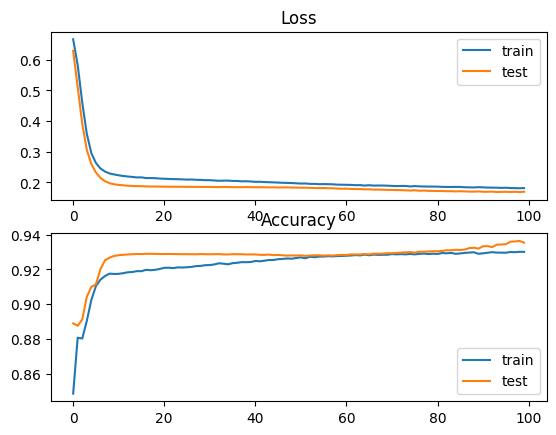

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [21]:

# predict probabilities for test set
yhat_probs = model.predict(val_LSTM_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

In [22]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# Convert predicted probabilities to binary predictions using a threshold
yhat_classes = (yhat_probs > 0.5).astype(int) # or any suitable threshold

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(val_LSTM_y, yhat_classes) # Use yhat_classes instead of yhat_probs
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(val_LSTM_y, yhat_classes) # Use yhat_classes instead of yhat_probs
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(val_LSTM_y, yhat_classes) # Use yhat_classes instead of yhat_probs
print('Recall: %f' % recall)

Accuracy: 0.937499
Precision: 0.988921
Recall: 0.884835


In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true=val_LSTM_y, y_pred=yhat_classes)
# yhat_classes now holds the discrete class predictions (0 or 1)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
labels = ['Normal','Fraud']



Confusion matrix, without normalization
[[85127   384]
 [10638 74440]]


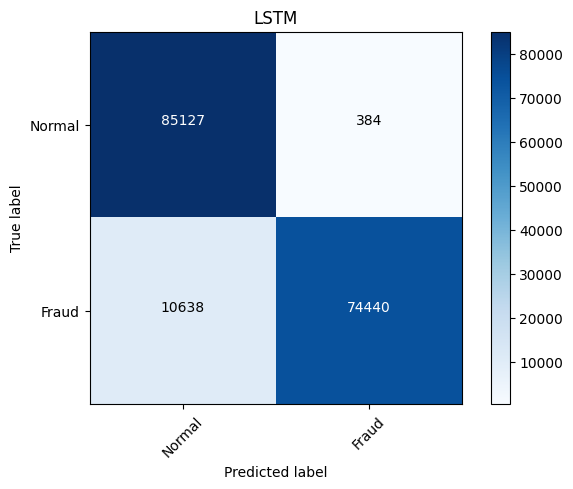

In [ ]:
plot_confusion_matrix(cm=cm, classes=labels, title='LSTM')


In [ ]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [ ]:
inputs1=Input((1,9))
att_in=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
att_in_1=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=attention()(att_in_1)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model1=Model(inputs1,outputs1)

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history1=model1.fit(train_LSTM_X, train_LSTM_y,epochs=100,batch_size=30000, validation_data=(val_LSTM_X, val_LSTM_y))


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 480ms/step - accuracy: 0.8077 - loss: 0.6810 - val_accuracy: 0.8951 - val_loss: 0.6439
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 307ms/step - accuracy: 0.8880 - loss: 0.6307 - val_accuracy: 0.8912 - val_loss: 0.5670
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 451ms/step - accuracy: 0.8841 - loss: 0.5508 - val_accuracy: 0.8892 - val_loss: 0.4711
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 304ms/step - accuracy: 0.8843 - loss: 0.4585 - val_accuracy: 0.8944 - val_loss: 0.3864
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 441ms/step - accuracy: 0.8905 - loss: 0.3800 - val_accuracy: 0.9036 - val_loss: 0.3217
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 305ms/step - accuracy: 0.8987 - loss: 0.3231 - val_accuracy: 0.9072 - val_loss: 0.2804
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 405ms/step - accuracy: 0.9051 - loss: 0.2886 - val_accuracy: 0.9100 - val_loss: 0.2548
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 346ms/step - accuracy: 0.9092 - loss: 0.2677 - val_acc

In [ ]:
# save Attention model and architecture to single file
model1.save('Save_Model_Attention.h5')
print("Saved model to disk")

Saved model to disk


In [ ]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model2= load_model('Save_Model_Attention.h5', custom_objects={'attention': attention})
# summarize model.
model2.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 1, 9)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 1, 50)               │          12,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 1, 50)               │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_1 (attention)              │ (None, 50)                  │              51 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,304 (126.19 KB)

 Trainable params: 32,302 (126.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# evaluate the model
_, train_acc = model2.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
_, test_acc = model2.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.930, Test: 0.929


In [ ]:
# predict probabilities for test set
yhat_probs1 = model1.predict(val_LSTM_X, verbose=0)
# reduce to 1d array
yhat_probs1 = yhat_probs1[:, 0]


NameError: name 'model1' is not defined

In [ ]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# Convert predicted probabilities to binary predictions using a threshold
yhat_classes = (yhat_probs1 > 0.5).astype(int) # Convert probabilities to class labels (0 or 1)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(val_LSTM_y, yhat_classes) # Use yhat_classes for accuracy calculation
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(val_LSTM_y, yhat_classes) # Use yhat_classes for precision calculation
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(val_LSTM_y, yhat_classes) # Use yhat_classes for recall calculation
print('Recall: %f' % recall)

Accuracy: 0.929339
Precision: 0.996047
Recall: 0.861739


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Convert predicted probabilities to binary predictions using a threshold
yhat_classes = (yhat_probs1 > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(val_LSTM_y, yhat_classes)  # Use yhat_classes for accuracy calculation
print('Accuracy: %f' % accuracy)

# precision for each class
precision_per_class = precision_score(val_LSTM_y, yhat_classes, average=None)
precision_0, precision_1 = precision_per_class[0], precision_per_class[1]
print('Precision_0: %f' % precision_0)
print('Precision_1: %f' % precision_1)

# recall for each class
recall_per_class = recall_score(val_LSTM_y, yhat_classes, average=None)
recall_0, recall_1 = recall_per_class[0], recall_per_class[1]
print('Recall_0: %f' % recall_0)
print('Recall_1: %f' % recall_1)

# F1-score for each class (optional)
from sklearn.metrics import f1_score
f1_per_class = f1_score(val_LSTM_y, yhat_classes, average=None)
f1_0, f1_1 = f1_per_class[0], f1_per_class[1]
print('F1_Score_0: %f' % f1_0)
print('F1_Score_1: %f' % f1_1)

# Confusion matrix (optional)
conf_matrix = confusion_matrix(val_LSTM_y, yhat_classes)
print("Confusion Matrix:")
print(conf_matrix)


NameError: name 'yhat_probs1' is not defined

In [ ]:
cm1 = confusion_matrix(y_true=val_LSTM_y, y_pred=yhat_classes)


Confusion matrix, without normalization
[[85220   291]
 [11763 73315]]


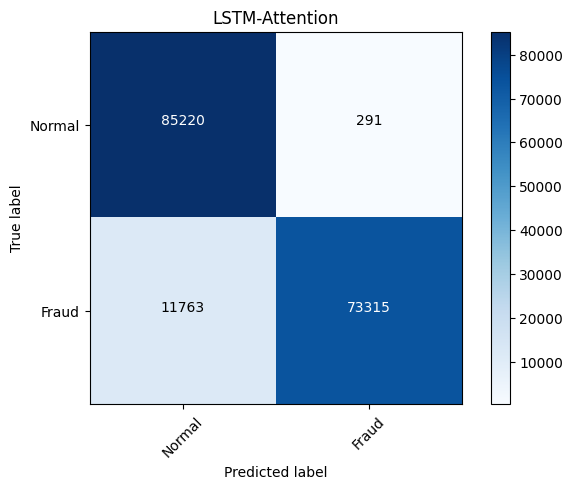

In [ ]:
plot_confusion_matrix(cm=cm1, classes=labels, title='LSTM-Attention', normalize=False)


In [24]:
import numpy as np
import pandas as pd

# Save y_test and y_pred as CSV files
np.savetxt("y_test_lstm.csv", y_test, delimiter=",")
np.savetxt("y_pred_lstm.csv", yhat_probs, delimiter=",")
